<a href="https://colab.research.google.com/github/GiX7000/10-machine-learning-algorithms-from-scratch/blob/main/02_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Linear Regression classifier

The best way to start your machine learning journey is with lineaar  regression. See briefly some of its most important concepts [here](https://www.youtube.com/watch?v=2cK_l1hbQao) and for deeper understanding see this [lecture](https://www.youtube.com/watch?v=4b4MUYve_U8). We will see a quick and dirty implementation of a linear regression classifier using MSE as a loss function.

In [1]:
## import libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

## 1. Create a simple sklearn's dataset and visualize it.

In [2]:
# create the dataset
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# let's see some things aboutt the data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train.dtype, X_test.dtype)
print(X_train[:5])
print(y_train[:5])

(80, 1) (80,) (20, 1) (20,)
float64 float64
[[0.17941071]
 [0.15846954]
 [0.52324766]
 [1.3799201 ]
 [0.33225315]]
[ 24.64812471 -19.07314539  37.35891532 117.99658351   9.55981705]


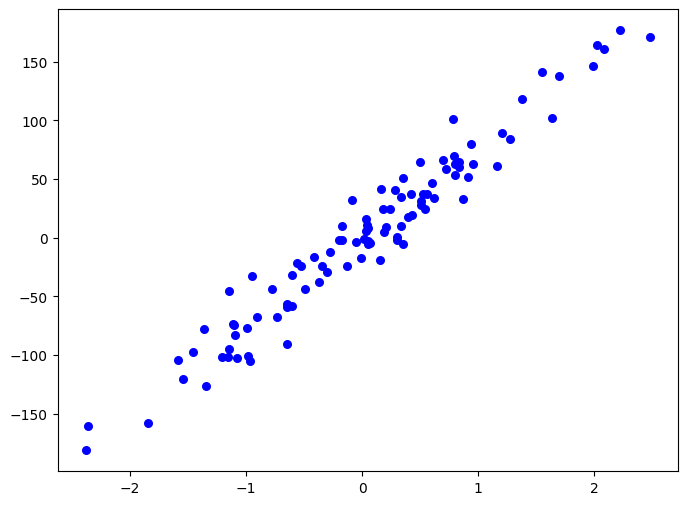

In [3]:
# plot the dataset
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color="b", marker="o", s=30)
plt.show()

## 2. Create the Linear Regression model.

In [4]:
# create the linear regression classifier as a class
class LinearRegression:

  # init function to define what elements(initialized or not) we are going to use inside this class
  def __init__(self, lr=0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    # set weights and bias to None for now
    self.weights = None
    self.bias = None

  # fit function for training
  def fit(self, X, y):
    # get the shape of the X input
    n_samples, n_features = X.shape
    # initialize weights and bias to 0 in the appropriate shape. Remember: y = X*w + b
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      # forward pass to calculate y_pred on X
      y_pred = np.dot(X, self.weights) + self.bias

      # calculate gradients of w and b
      dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
      db = (1/n_samples) * np.sum(y_pred - y)

      # update weights and bias
      self.weights -= self.lr * dw
      self.bias -= self.lr * db


  # predict function for inference
  def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred

## 3. Train, predict and evaluate the model.

In [5]:
# create ana instance of our linear classifier
clf_reg = LinearRegression()

# train the model
clf_reg.fit(X_train, y_train)

In [6]:
# predict on test set
predictions = clf_reg.predict(X_test)

# Print the predictions and the actual labels
print("Predictions:", np.array(predictions))
print("Actual Labels:", y_test)

Predictions: [ 57.83246218  42.00924423 -28.59823179 -52.02216563  13.81950685
 -46.5689011   -9.00120788  97.0321705    9.41320955 -64.62890038
  10.40071456  26.97461725  17.17051168  24.7572713   24.28770182
 -23.29124742 -52.42649671  17.23483664  24.76400502  19.2393394 ]
Actual Labels: [  89.5978923    33.21708479  -58.51318402  -82.91713341   40.69772522
 -100.73717846   -1.65856494  163.94385144    5.26394625  -77.78704394
    9.20267903   36.86598297   -5.54348338   31.43120085   64.53968736
  -44.1299115   -74.76820338   50.92876904   28.14443518   17.68768961]


Let's use how good our model is.

In [7]:
# mse
def mean_squared_error(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

mse = mean_squared_error(y_test, predictions)
print(mse)

# r2_score
def r2_score(y_true, y_pred):
  # Calculate total sum of squares (TSS)
  tss = np.sum((y_true - np.mean(y_true)) ** 2)

  # Calculate sum of squared errors (SSE) using mean squared error
  sse = np.sum(mean_squared_error(y_true, y_pred))

  # Calculate R^2 score
  r2 = 1 - (sse / tss)
  return r2

r2 = r2_score(y_test, predictions)
print(r2)

783.8155465125494
0.9903554745603138


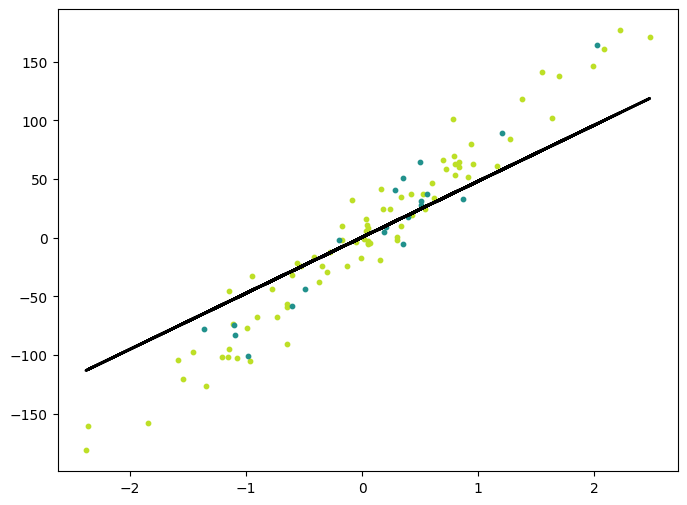

In [8]:
# plot the results
y_pred_line = clf_reg.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
xtr = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
xt = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()

It could be better. Let's try for a bigger  learning rate.

In [9]:
# create ana instance of our linear classifier
clf_reg_2 = LinearRegression(lr=0.01)

# train the model
clf_reg_2.fit(X_train, y_train)

In [10]:
# predict on test set
predictions = clf_reg_2.predict(X_test)

# let's see now the new mse and r2
mse = mean_squared_error(y_test, predictions)
print(mse)
r2 = r2_score(y_test, predictions)
print(r2)

305.7719958301902
0.996237602321555


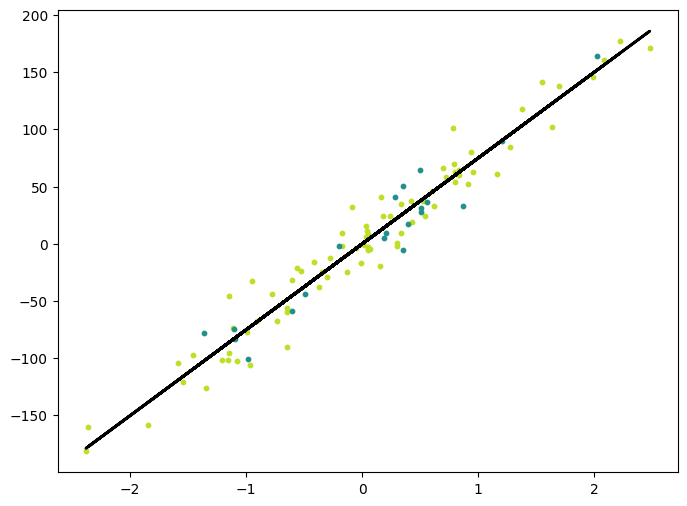

In [11]:
# plot the results
y_pred_line = clf_reg_2.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
xtr = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
xt = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()

This is a better classification according to the above line. Observe that we also get much less mse and larger r2 accuracy, as it is reasonable.

## 4. Compare with LinearRRegression classifier from scikit-learn library.

Let's see now, what results a [LinearRegression classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from scikit-learn library gives us.

In [12]:
# let's compare now with the accuracy that sklearn gives us
from sklearn.linear_model import LinearRegression

clf_sklearn = LinearRegression()
clf_sklearn.fit(X_train, y_train)
sklearn_predictions = clf_sklearn.predict(X_test)

In [13]:
# let's check mse and r2
mse_sklearn = mean_squared_error(y_test, sklearn_predictions)
print(mse_sklearn)
r2_sklearn = r2_score(y_test, sklearn_predictions)
print(r2_sklearn)
# sklearn has its own r2, let's see it
print(clf_sklearn.score(X_test, y_test))

305.7741316228642
0.9962375760415114
0.9247515208302274


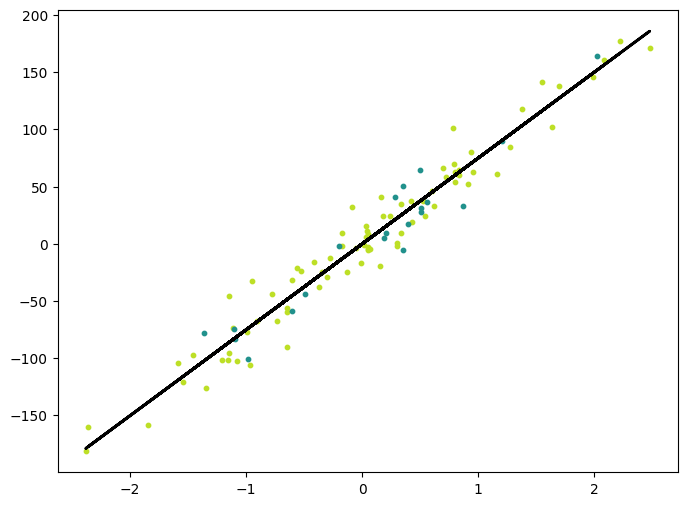

In [14]:
y_pred_line = clf_sklearn.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
xtr = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
xt = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()

We get exactly the same results as the our second model(lr=0.01) and that's exactly how LinearRegression from scikit-learn works.